In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('/content/data.csv')
del data['Unnamed: 32']

In [2]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [4]:
classifier = Sequential()

In [5]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [6]:
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [8]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [9]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error. Still looking for more efficient ways. Open to suggestions. 

Epoch 1/150
6/6 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.6270
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.6621
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.6895
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.7715
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6756 - accuracy: 0.8613
Epoch 6/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6629 - accuracy: 0.9160
Epoch 7/150
6/6 [==============================] - 0s 4ms/step - loss: 0.6441 - accuracy: 0.9297
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.9355
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.9453
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.9414
Epoch 11/150
6/6 [===========

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 5ms/step


In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35,  0],
       [ 0, 22]])

In [13]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 100.0%


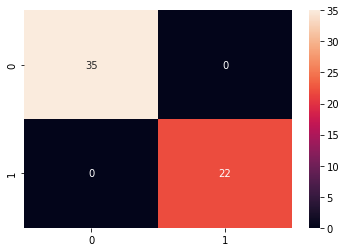

In [14]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')